In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib
matplotlib.rcParams['font.size'] = 16
%config InlineBackend.figure_format='retina'
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

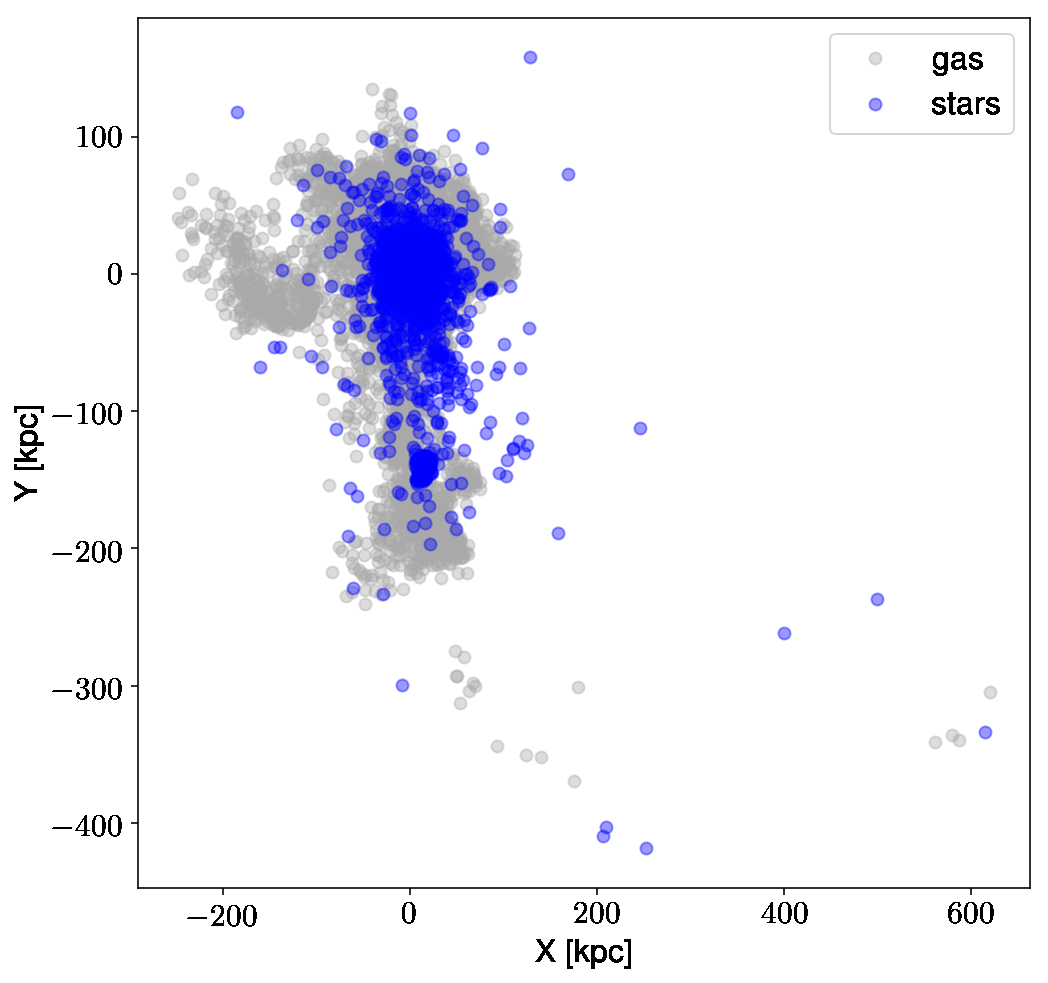

In [2]:
h=0.704
com = [65669.8, 71339., 57069.25]
gas = np.loadtxt('../data/M31analog_361428_gas_properties.txt')
x = (gas[:,0]-com[0])/h
y = (gas[:,1]-com[1])/h
z = (gas[:,2]-com[2])/h

#x = (gas[:,0])/h
#y = (gas[:,1])/h
#z = (gas[:,2])/h

stars = np.loadtxt('../data/M31analog_361428_star_properties.txt')
x2 = (stars[:,0]-com[0])/h
y2 = (stars[:,1]-com[1])/h
z2 = (stars[:,2]-com[2])/h

#x2 = (stars[:,0])/h
#y2 = (stars[:,1])/h
#z2 = (stars[:,2])/h

plt.figure(figsize=(8,8))
plt.plot(x,y,'o', color='darkgray', alpha=0.4, label='gas') 
plt.plot(x2,y2,'o', color='blue', alpha=0.4, label='stars')
plt.legend()
plt.xlabel ('X [kpc]')
plt.ylabel('Y [kpc]')

In [3]:

gas = np.loadtxt('../data/M31analog_361428_gas_properties_rotated.txt')
x = gas[:,0]/h
y = gas[:,1]/h
z = gas[:,2]/h 
nh = gas[:,7]

stars = np.loadtxt('../data/M31analog_361428_star_properties_rotated.txt')
x2 = stars[:,0]/h
y2 = stars[:,1]/h
z2 = stars[:,2]/h

aform = np.array(stars[:,7]) #a= 1/(1+z) --> z = 1/a - 1  
x2 = x2[aform >= 0.]
y2 = y2[aform >= 0.]
z2 = z2[aform >= 0.]
aform = aform[aform >= 0.]

zform = [(1./a) -1. for a in aform]
cosmo = FlatLambdaCDM(H0=70.4, Om0=0.2726, Ob0=0.0456)
tform = [float(cosmo.age(z)/u.Gyr) for z in zform] #time the stars formed in lookback time, not age                                                           
age = np.array([13.8-t for t in tform])

group1 = (.0 <= age) & (age <=.06) #average age 30 Myr                                                                                                            
group2 = (.34 <= age) & (age <=.46) #average age 400 Myr                                                                                                          
group3 = (1.7 <= age) & (age <=2.3) #average age 2 Gyr                                                                                                            
group4 = (3.7 <= age) & (age <=4.3) #average age 4 Gyr

print len(x2[group1]), len(x2[group2]), len(x2[group3]), len(x2[group4])


28 349 1210 1996


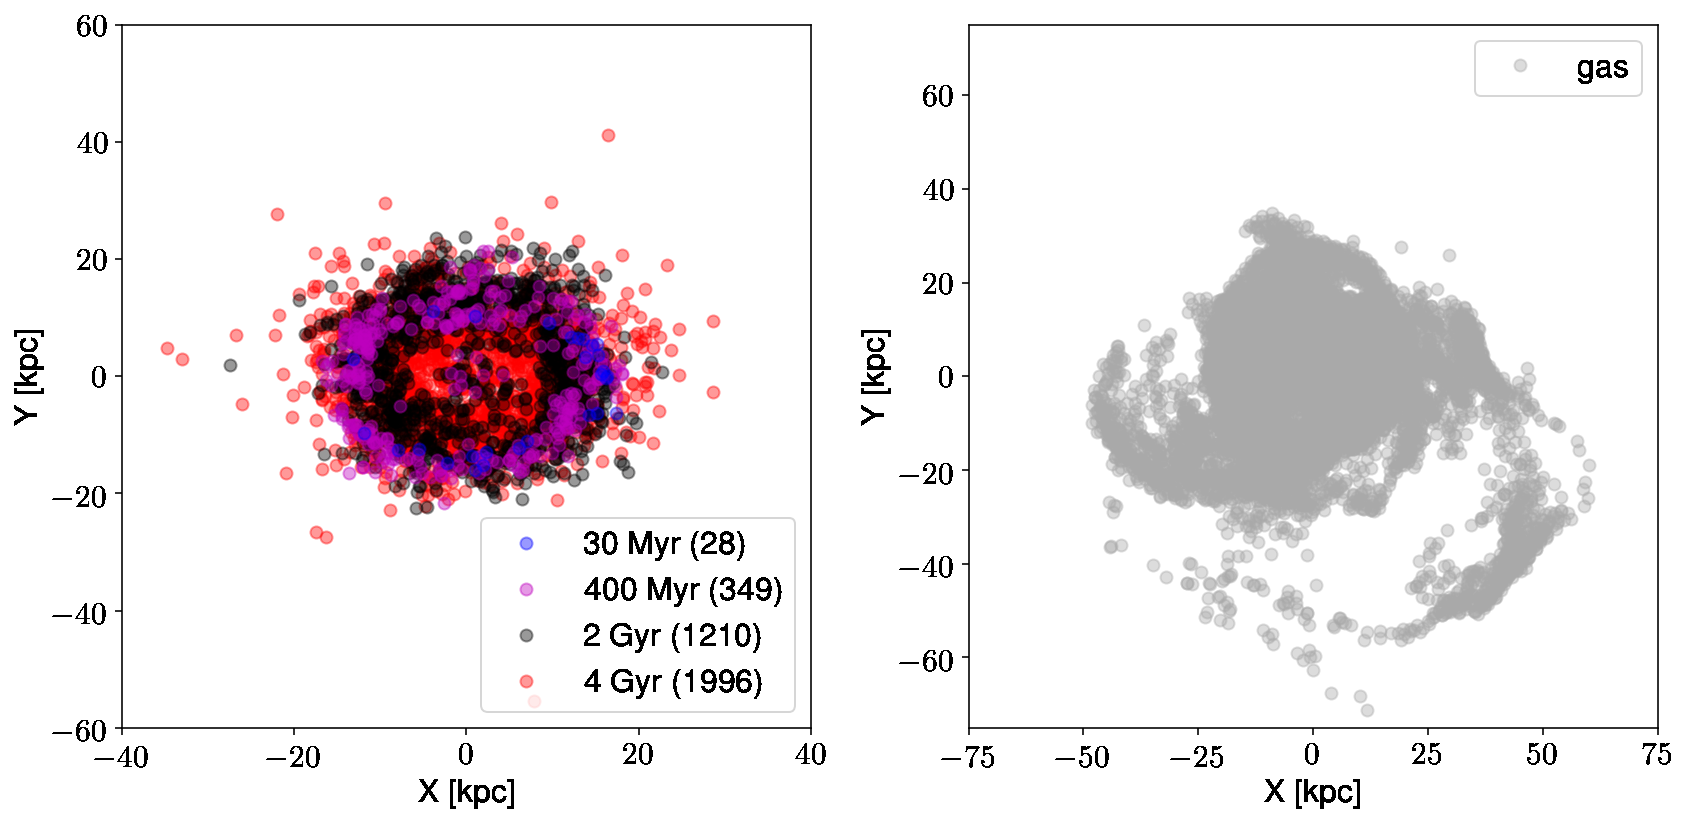

In [4]:
plt.figure(figsize=(12,6))
plt.subplot(121)
#plt.plot(x,y,'o', color='darkgrey', alpha=0.4, label='gas', zorder=-1000) 
plt.plot(x2[group1],y2[group1], 'o', color='blue', alpha=0.4, label='30 Myr (%s)'%len(x2[group1]), zorder=-70)
plt.plot(x2[group2], y2[group2], 'o', color='m', alpha=0.4, label='400 Myr (%s)'%len(x2[group2]), zorder=-80)
plt.plot(x2[group3], y2[group3], 'o', color='k', alpha=0.4, label='2 Gyr (%s)'%len(x2[group3]), zorder=-90)
plt.plot(x2[group4], y2[group4], 'o', color='r', alpha=0.4, label='4 Gyr (%s)'%len(x2[group4]), zorder=-100)
#plt.plot(x3,y3, 'o', color='red', alpha=0.1, label='dm')
plt.xlim(-40, 40)
plt.ylim(-60, 60)
plt.legend()
plt.xlabel ('X [kpc]')
plt.ylabel('Y [kpc]')

plt.subplot(122)
plt.plot(x[nh > 0.7],y[nh > 0.7],'o', color='darkgrey', alpha=0.4, label='gas')
plt.legend()
plt.xlabel ('X [kpc]')
plt.ylabel('Y [kpc]')
plt.xlim(-75,75)
plt.ylim(-75,75)
plt.tight_layout()
plt.savefig('M31analog_361428.png')
